In [7]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
from PIL import Image

In [8]:
img_dir = '/Users/Kirill/lerning/Kaggle/Face Mask Detection/images'             # Путь до файлов
annot_dir = '/Users/Kirill/lerning/Kaggle/Face Mask Detection/annotations'

In [ ]:
cv2.COL

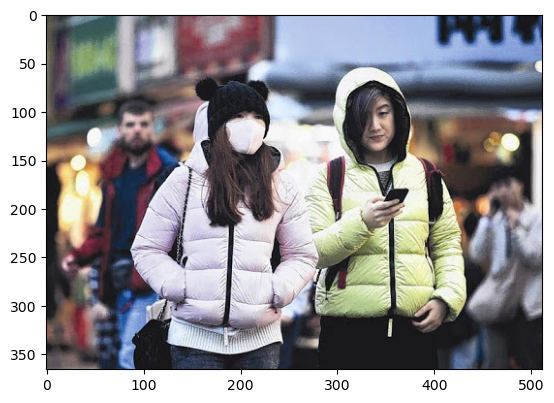

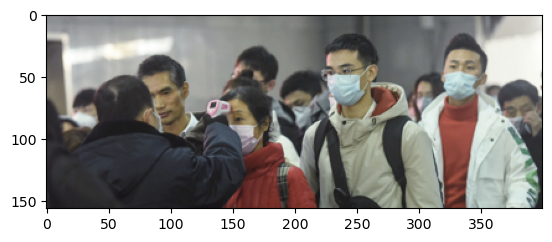

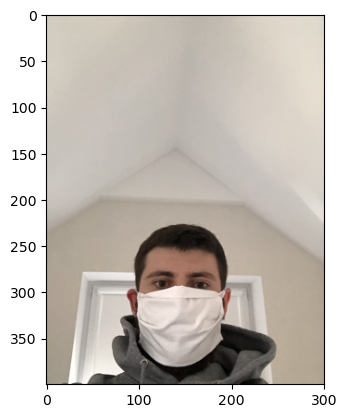

In [24]:
for idx, image in enumerate(os.listdir(img_dir)):  # listdir открывает все, что находится в папке img_dir
    img = cv2.imread(os.path.join(img_dir, image)) # Соединение пути и объекта (img_dir и image)
    imageRGB = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) # Изначально передаются цвета в формате BGR, поэтому все фотки синие
    plt.imshow(imageRGB)                             # cv2.COLOR_BGR2RGB преобразует в правильную последовательнось цветов
    plt.show()
    if idx==2:
        break

In [10]:
img_file = []                                         # Создание пустого списка
for img in os.listdir(img_dir):                       # Итерация по объектам
    images = cv2.imread(os.path.join(img_dir, img))   # Соединение пути с объектом
    img_file.append(images)                           # Добавление в список (переводит в array)

In [11]:
import xml.etree.ElementTree as ET
import glob

In [12]:
# Два варианта вытащить полный путь до файла

# glob.glob(annot_dir + '/*xml')       # Путь до файла целиком

# exemple = []
# for anno in os.listdir(annot_dir):      # Либо без использования glob,с помощью итарации
#     ex = os.path.join(annot_dir, anno)  # Оба варианта будут идентичными
#     exemple.append(ex)

In [13]:
df = {'name': [],      # Создание словаря, который в будущем будет переделан в датафрейм
     'label': [],
     'widht': [],
     'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

width = []
height = []

for idx, anno in enumerate(glob.glob(annot_dir + '/*.xml')):                    # Итерация по индексам и пути файла
    trees = ET.parse(anno).getroot()                                            # Создание корня 
    for item in trees.iter():                                                   # Итерация по всему дереву файла
        if item.tag == 'size':                                                  # Поиск по tag
            for attr in list(item):                                             # Переход в следующую ветвь
                if attr.tag =='width':
                    width = int(attr.text)                                      # Если сразу добавлять в датасет
                if attr.tag == 'height':                                        # будет несоответствие размеров
                    height = int(attr.text)
                                                                                # В остальном все идентично
        if item.tag == 'object':
            for attr in list(item):
                if attr.tag == 'name':
                    df['label'].append(attr.text)
                    df['widht'].append(width)
                    df['height'].append(height)
                    df['name'].append(anno.split('/')[-1].split('\\')[-1][0:-4])
                    
                if attr.tag == 'bndbox':
                    for coor in list(attr):
                        if coor.tag == 'xmin':
                            df['xmin'].append(int(coor.text))
                        if coor.tag == 'ymin':
                            df['ymin'].append(int(coor.text))
                        if coor.tag == 'xmax':
                            df['xmax'].append(int(coor.text))
                        if coor.tag == 'ymax':
                            df['ymax'].append(int(coor.text))

In [14]:
data = pd.DataFrame(df)
data.head()

,name,label,widht,height,xmin,ymin,xmax,ymax
0,maksssksksss0,without_mask,512,366,79,105,109,142
1,maksssksksss0,with_mask,512,366,185,100,226,144
2,maksssksksss0,without_mask,512,366,325,90,360,141
3,maksssksksss1,with_mask,400,156,321,34,354,69
4,maksssksksss1,with_mask,400,156,224,38,261,73


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4072 non-null   object
 1   label   4072 non-null   object
 2   widht   4072 non-null   int64 
 3   height  4072 non-null   int64 
 4   xmin    4072 non-null   int64 
 5   ymin    4072 non-null   int64 
 6   xmax    4072 non-null   int64 
 7   ymax    4072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 254.6+ KB


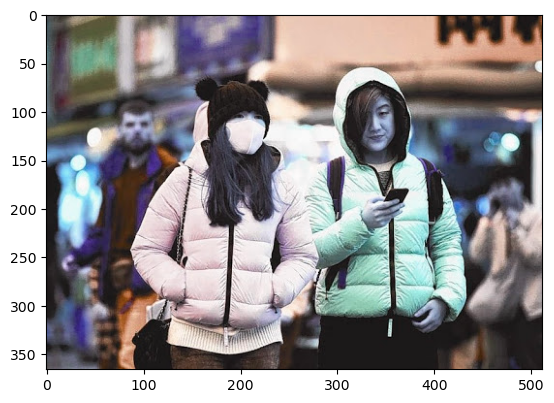

In [33]:
plt.imshow(cv2.imread(os.path.join(img_dir, os.listdir(img_dir)[0])))
sns.re